In [ ]:
pip install requests

In [ ]:
pip install requests pandas

# Web scraping

In [ ]:
pip install requests beautifulsoup4 pandas


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from google.colab import files
import time

# URL of the Psychoactive Substance Index page
base_url = "https://psychonautwiki.org"
index_url = f"{base_url}/wiki/Psychoactive_substance_index"

# Fetch the main page
response = requests.get(index_url)
if response.status_code != 200:
    print(f"Failed to fetch the index page. Status code: {response.status_code}")
else:
    # Parse the main page content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Initialize the data list
    drugs_data = []

    # Locate drug links
    drug_links = soup.select('div.flex-panel ul li a')  # Target all <a> tags within relevant sections
    for drug in drug_links[:]:  # Limit to 10 drugs for testing
        drug_name = drug.text.strip()
        drug_url = f"{base_url}{drug['href']}"  # Full URL of the drug page

        # Visit the drug's page
        try:
            drug_response = requests.get(drug_url)
            if drug_response.status_code == 200:
                drug_soup = BeautifulSoup(drug_response.content, 'html.parser')

                # Extract Molecular Formula
                molecular_formula = "Not Available"
                info_box = drug_soup.find('table', class_='infobox')
                if info_box:
                    rows = info_box.find_all('tr')
                    for row in rows:
                        if 'Molecular formula' in row.text:
                            molecular_formula = row.find('td').text.strip()
                            break

                # Extract Effects
                effects = "Not Available"
                effects_section = drug_soup.find('span', {'id': 'Subjective_effects'})
                if effects_section:
                    effects_paragraphs = effects_section.find_next('p')
                    if effects_paragraphs:
                        effects = effects_paragraphs.text.strip()

                # Append data to the list
                drugs_data.append({
                    'Drug Name': drug_name,
                    'URL': drug_url,
                    'Molecular Formula': molecular_formula,
                    'Effects': effects
                })
        except Exception as e:
            print(f"Error fetching data for {drug_name}: {e}")

        # Add delay to avoid rate limiting
        time.sleep(2)

    # Convert the data into a DataFrame
    df = pd.DataFrame(drugs_data)

    # Save to a CSV file
    df.to_csv("psychoactive_drugs_with_details.csv", index=False)

    # Download the CSV
    files.download("psychoactive_drugs_with_details.csv")

    print("Scraping complete! File saved and available for download.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Scraping complete! File saved and available for download.


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from google.colab import files

# URL of the Psychoactive Substance Index page
base_url = "https://psychonautwiki.org"
index_url = f"{base_url}/wiki/Psychoactive_substance_index"

# Fetch the main index page
response = requests.get(index_url)
if response.status_code != 200:
    print(f"Failed to fetch the index page. Status code: {response.status_code}")
else:
    # Parse the main index page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Initialize the data list
    drugs_data = []

    # Locate drug links
    drug_links = soup.select('div.flex-panel ul li a')  # Target all <a> tags within relevant sections
    for drug in drug_links[:50]:  # Limit to 50 drugs for testing; remove this limit for the full scrape
        drug_name = drug.text.strip()
        drug_url = f"{base_url}{drug['href']}"  # Full URL of the drug page

        # Visit the drug's page
        drug_response = requests.get(drug_url)
        if drug_response.status_code == 200:
            drug_soup = BeautifulSoup(drug_response.content, 'html.parser')

            # Extract Molecular Formula
            molecular_formula = None
            info_box = drug_soup.find('table', class_='infobox')  # Look for infobox
            if info_box:
                rows = info_box.find_all('tr')  # Look for all rows in the table
                for row in rows:
                    if 'Molecular formula' in row.text:  # Find the row containing "Molecular formula"
                        molecular_formula = row.find('td').text.strip()  # Extract the value
                        break

#to retrieve the effects listed out too
            effects = None
            effects_section = drug_soup.find('span', {'id': 'Subjective_effects'})  # Locate the "Subjective Effects" section
            if effects_section:
                effects_paragraphs = effects_section.find_next('p')
                if effects_paragraphs:
                    effects = effects_paragraphs.text.strip()

            drugs_data.append({
                'Drug Name': drug_name,
                'Molecular Formula': molecular_formula,
                'Effects': effects
            })
        else:
            print(f"Failed to fetch {drug_name} page. Status code: {drug_response.status_code}")

    # Convert the data into a DataFrame
    df = pd.DataFrame(drugs_data)

    # Save to a CSV file
    df.to_csv("psychoactive_drugs_with_details.csv", index=False)

    # Download the CSV
    files.download("psychoactive_drugs_with_details.csv")

    print("Scraping complete! File saved and available for download.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Scraping complete! File saved and available for download.


In [ ]:
import requests

def get_molecular_formula_from_pubchem(drug_name):
    """
to connect to the API, first we query and then request, wait for the response    """
    base_url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name"
    endpoint = f"{base_url}/{drug_name}/property/MolecularFormula/JSON"

    try:
        response = requests.get(endpoint, timeout=10)
        response.raise_for_status()

        data = response.json()
        if 'PropertyTable' in data and 'Properties' in data['PropertyTable']:
            return data['PropertyTable']['Properties'][0].get('MolecularFormula', "Not Found")
        else:
            return "Not Found"
    except Exception as e:
        print(f"Error fetching formula for {drug_name}: {e}")
        return "Error"


In [ ]:
df = pd.DataFrame(drugs_data)

df.to_csv("psychoactive_drugs_with_pubchem_details.csv", index=False)

files.download("psychoactive_drugs_with_pubchem_details.csv")


In [ ]:
pip install requests pandas openpyxl


>>>>checking if the drugs are able to connect to the api




In [ ]:
import requests
import pandas as pd

def resolve_name_to_cid(drug_name):
    """
    Resolves a drug name to its PubChem CID using the PubChem API.
    """
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{drug_name}/cids/JSON"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        cids = data.get("IdentifierList", {}).get("CID", [])
        return cids[0] if cids else None
    except Exception as e:
        print(f"Error resolving {drug_name}: {e}")
        return None

def create_drugs_dictionary(input_csv, output_csv):
    """
    Reads drug names from a CSV file, makes API calls to get PubChem CIDs,
    and saves the results as a dictionary and a new CSV file.
    """
    try:
        drugs_df = pd.read_csv(input_csv)
        if "Drug Name" not in drugs_df.columns:
            print("Error: 'Drug Name' column not found in the CSV file.")
            return
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return

    drugs_dict = {}
    for drug_name in drugs_df["Drug Name"]:
        cid = resolve_name_to_cid(drug_name)
        drugs_dict[drug_name] = cid
        print(f"Resolved: {drug_name} -> CID: {cid}")

    results_df = pd.DataFrame(list(drugs_dict.items()), columns=["Drug Name", "CID"])

    results_df.to_csv(output_csv, index=False)
    print(f"Results saved to {output_csv}")

    return drugs_dict

if __name__ == "__main__":
    input_csv = "psychoactive_drugs_with_details.csv"  #  input file
    output_csv = "resolved_drugs.csv"  # Output file with results

    drugs_dict = create_drugs_dictionary(input_csv, output_csv)
    print("Drugs Dictionary:", drugs_dict)


Error resolving Classical psychedelics: 404 Client Error: PUGREST.NotFound for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/Classical%20psychedelics/cids/JSON
Resolved: Classical psychedelics -> CID: None
Error resolving Psilocybin mushrooms: 404 Client Error: PUGREST.NotFound for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/Psilocybin%20mushrooms/cids/JSON
Resolved: Psilocybin mushrooms -> CID: None
Resolved: LSD -> CID: 5761
Resolved: Mescaline -> CID: 4076
Error resolving DMT: 404 Client Error: PUGREST.NotFound for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/DMT/cids/JSON
Resolved: DMT -> CID: None
Error resolving Ayahuasca: 404 Client Error: PUGREST.NotFound for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/Ayahuasca/cids/JSON
Resolved: Ayahuasca -> CID: None
Error resolving Lysergamides: 404 Client Error: PUGREST.NotFound for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/Lysergamides/cids/JSON
Resolved:

TRIAL 2: TO CHECK IF THE API IS GETTING CONNECTED OR NOT


In [ ]:
import os
import requests
import pandas as pd
import time

def resolve_name_to_cid(drug_name):

    base_url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"


    try:
        url = f"{base_url}/compound/name/{drug_name}/cids/JSON"
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        cids = data.get("IdentifierList", {}).get("CID", [])
        if cids:
            return cids[0]
    except Exception as e:
        print(f"Direct resolution failed for '{drug_name}': {e}")


    try:
        url = f"{base_url}/substance/name/{drug_name}/cids/JSON"
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        cids = data.get("IdentifierList", {}).get("CID", [])
        if cids:
            return cids[0]
    except Exception as e:
        print(f"Synonym resolution failed for '{drug_name}': {e}")

    return None #if all attempts fai;
def create_drugs_dictionary(input_csv, output_csv, unresolved_log="unresolved_drugs.csv"):


    try:
        drugs_df = pd.read_csv(input_csv)
        if "Drug Name" not in drugs_df.columns:
            print("Error: 'Drug Name' column not found in the CSV file.")
            return
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return

    # Create a dictionary to store results
    drugs_dict = {}
    unresolved_drugs = []

    for drug_name in drugs_df["Drug Name"]:
        # Clean drug name for consistency
        clean_name = drug_name.strip()
        cid = resolve_name_to_cid(clean_name)
        if cid:
            drugs_dict[clean_name] = cid
            print(f"Resolved: {clean_name} -> CID: {cid}")
        else:
            drugs_dict[clean_name] = None
            unresolved_drugs.append(clean_name)
            print(f"Could not resolve: {clean_name}")

        time.sleep(0.2)  # we should pause the time in order to not overload the requests

    results_df = pd.DataFrame(list(drugs_dict.items()), columns=["Drug Name", "CID"])

    output_dir = os.path.abspath(os.getcwd())
    output_csv_path = os.path.join(output_dir, output_csv)
    unresolved_log_path = os.path.join(output_dir, unresolved_log)

    results_df.to_csv(output_csv_path, index=False)
    print(f"Results saved to {output_csv_path}")

    if unresolved_drugs:
        pd.DataFrame(unresolved_drugs, columns=["Unresolved Drug Name"]).to_csv(unresolved_log_path, index=False)
        print(f"Unresolved drug names saved to {unresolved_log_path}")

    return drugs_dict

if __name__ == "__main__":

    input_csv = "psychoactive_drugs_with_details.csv"
    output_csv = "resolved_drugs.csv"  # Output file with results
    unresolved_log = "unresolved_drugs.csv"  # Log of unresolved drugs


    drugs_dict = create_drugs_dictionary(input_csv, output_csv, unresolved_log)
    print("Drugs Dictionary:", drugs_dict)



resolved_df = pd.read_csv("resolved_drugs.csv")
print("Resolved Drugs:\n", resolved_df)

unresolved_df = pd.read_csv("unresolved_drugs.csv")
print("Unresolved Drugs:\n", unresolved_df)


Direct resolution failed for 'Classical psychedelics': 404 Client Error: PUGREST.NotFound for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/Classical%20psychedelics/cids/JSON
Synonym resolution failed for 'Classical psychedelics': 404 Client Error: PUGREST.NotFound for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/name/Classical%20psychedelics/cids/JSON
Could not resolve: Classical psychedelics
Direct resolution failed for 'Psilocybin mushrooms': 404 Client Error: PUGREST.NotFound for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/Psilocybin%20mushrooms/cids/JSON
Synonym resolution failed for 'Psilocybin mushrooms': 404 Client Error: PUGREST.NotFound for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/name/Psilocybin%20mushrooms/cids/JSON
Could not resolve: Psilocybin mushrooms
Resolved: LSD -> CID: 5761
Resolved: Mescaline -> CID: 4076
Direct resolution failed for 'DMT': 404 Client Error: PUGREST.NotFound for url: https://pubchem.ncbi.n

In [ ]:
import pandas as pd

# Define file paths
resolved_file_path = "resolved_with_manual_input.csv"
unresolved_file_path = "unresolved_after_manual_input.csv"
manual_entries_file_path = "manual_entries.csv"

# Function to read and display CSV contents
def display_csv_contents(file_path, file_description):
    try:
        # Read the CSV file into a DataFrame
        data = pd.read_csv(file_path)

        # Display file description
        print(f"\n--- {file_description} ---")

        # Display contents of the file
        print(data)

        # Optionally, display only the first 10 rows if the file is large
        print(f"\nPreview of the first 10 rows of {file_description}:")
        print(data.head(50))

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred while reading {file_description}: {e}")

# Display contents of all the files
display_csv_contents(resolved_file_path, "Resolved Drugs Data")
display_csv_contents(unresolved_file_path, "Unresolved Drugs Data")
display_csv_contents(manual_entries_file_path, "Manual Entries Data")




--- Resolved Drugs Data ---
                 Drug Name       CID
0               Psilocybin     10624
1   N,N-Dimethyltryptamine      6089
2      Lysergic acid amide    442072
3          D-Lysergic acid      6717
4               Tryptamine      1150
5   alpha-methyltryptamine      9287
6        Diethyltryptamine      6090
7       Dipropyltryptamine      6091
8    Ethylpropyltryptamine  74405184
9   Methylpropyltryptamine  74405270
10      N-Methyltryptamine      6088

Preview of the first 10 rows of Resolved Drugs Data:
                 Drug Name       CID
0               Psilocybin     10624
1   N,N-Dimethyltryptamine      6089
2      Lysergic acid amide    442072
3          D-Lysergic acid      6717
4               Tryptamine      1150
5   alpha-methyltryptamine      9287
6        Diethyltryptamine      6090
7       Dipropyltryptamine      6091
8    Ethylpropyltryptamine  74405184
9   Methylpropyltryptamine  74405270
10      N-Methyltryptamine      6088

--- Unresolved Drugs Data --

In [ ]:
import pandas as pd
from google.colab import files

# Define file paths
resolved_file_path = "resolved_with_manual_input.csv"
unresolved_file_path = "unresolved_after_manual_input.csv"
manual_entries_file_path = "manual_entries.csv"

# Function to read, display, and download CSV files
def display_and_download_csv(file_path, file_description):
    try:
        # Read the CSV file into a DataFrame
        data = pd.read_csv(file_path)

        # Display file description
        print(f"\n--- {file_description} ---")

        # Display contents of the file
        print(data)

        # Optionally, display only the first 10 rows if the file is large
        print(f"\nPreview of the first 10 rows of {file_description}:")
        print(data.head(10))

        # Download the CSV file
        files.download(file_path)
        print(f"{file_description} file has been made available for download.")

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred while processing {file_description}: {e}")

# Display and download all the files
display_and_download_csv(resolved_file_path, "Resolved Drugs Data")
display_and_download_csv(unresolved_file_path, "Unresolved Drugs Data")
display_and_download_csv(manual_entries_file_path, "Manual Entries Data")



--- Resolved Drugs Data ---
                 Drug Name       CID
0               Psilocybin     10624
1   N,N-Dimethyltryptamine      6089
2      Lysergic acid amide    442072
3          D-Lysergic acid      6717
4               Tryptamine      1150
5   alpha-methyltryptamine      9287
6        Diethyltryptamine      6090
7       Dipropyltryptamine      6091
8    Ethylpropyltryptamine  74405184
9   Methylpropyltryptamine  74405270
10      N-Methyltryptamine      6088

Preview of the first 10 rows of Resolved Drugs Data:
                Drug Name       CID
0              Psilocybin     10624
1  N,N-Dimethyltryptamine      6089
2     Lysergic acid amide    442072
3         D-Lysergic acid      6717
4              Tryptamine      1150
5  alpha-methyltryptamine      9287
6       Diethyltryptamine      6090
7      Dipropyltryptamine      6091
8   Ethylpropyltryptamine  74405184
9  Methylpropyltryptamine  74405270


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Resolved Drugs Data file has been made available for download.

--- Unresolved Drugs Data ---
      Unresolved Drug Name
0   Classical psychedelics
1                Ayahuasca
2                1cP-MiPLA
3  Substituted tryptamines

Preview of the first 10 rows of Unresolved Drugs Data:
      Unresolved Drug Name
0   Classical psychedelics
1                Ayahuasca
2                1cP-MiPLA
3  Substituted tryptamines


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Unresolved Drugs Data file has been made available for download.

--- Manual Entries Data ---
           Original Name                Manual Entry
0   Psilocybin mushrooms                  Psilocybin
1                    DMT      N,N-Dimethyltryptamine
2              Ayahuasca  Banisteriopsis caapi whole
3           Lysergamides         Lysergic acid amide
4                    LSH             D-Lysergic acid
5       Base tryptamines                  Tryptamine
6                    aMT      alpha-methyltryptamine
7                    DET           Diethyltryptamine
8                    DPT          Dipropyltryptamine
9                    EPT       Ethylpropyltryptamine
10                   MPT      Methylpropyltryptamine
11                   NMT          N-Methyltryptamine

Preview of the first 10 rows of Manual Entries Data:
          Original Name                Manual Entry
0  Psilocybin mushrooms                  Psilocybin
1                   DMT      N,N-Dimethyltryptamine
2      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Manual Entries Data file has been made available for download.


In [ ]:
import requests
import pandas as pd

def resolve_name_to_cid(drug_name):
    """
    Resolves a drug name to its PubChem CID using the PubChem API.
    """
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{drug_name}/cids/JSON"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        cids = data.get("IdentifierList", {}).get("CID", [])
        return cids[0] if cids else None
    except Exception as e:
        print(f"Error resolving {drug_name}: {e}")
        return None

def create_drugs_dictionary(input_csv, output_csv):
    """
    Reads drug names from a CSV file, makes API calls to get PubChem CIDs,
    and saves the results as a dictionary and a new CSV file.
    """
    try:
        # Read the CSV file
        drugs_df = pd.read_csv(input_csv)
        print(f"Total drugs found in input CSV: {len(drugs_df)}")

        if "Drug Name" not in drugs_df.columns:
            print("Error: 'Drug Name' column not found in the CSV file.")
            return
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return

    print("First few rows of the input DataFrame:")
    print(drugs_df.head())

    missing_drugs = drugs_df["Drug Name"].isna().sum()
    unique_drugs_count = drugs_df["Drug Name"].nunique()
    total_drugs_count = len(drugs_df)

    print(f"Total drugs (rows): {total_drugs_count}")
    print(f"Missing drug names: {missing_drugs}")
    print(f"Unique drug names: {unique_drugs_count}")

    drugs_dict = {}
    successful_resolutions = 0
    unsuccessful_resolutions = 0

    for drug_name in drugs_df["Drug Name"]:
        if pd.isna(drug_name):
            continue

        cid = resolve_name_to_cid(drug_name)
        drugs_dict[drug_name] = cid
        if cid:
            successful_resolutions += 1
        else:
            unsuccessful_resolutions += 1
        print(f"Resolved: {drug_name} -> CID: {cid}")

    print(f"Number of successfully resolved drugs: {successful_resolutions}")
    print(f"Number of unresolved drugs: {unsuccessful_resolutions}")


    results_df = pd.DataFrame(list(drugs_dict.items()), columns=["Drug Name", "CID"])

    results_df.to_csv(output_csv, index=False)
    print(f"Results saved to {output_csv}")

    return drugs_dict

if __name__ == "__main__":

    input_csv = "psychoactive_drugs_with_details.csv"  # Your input file
    output_csv = "resolved_drugs.csv"  # Output file with results

    drugs_dict = create_drugs_dictionary(input_csv, output_csv)
    print("Drugs Dictionary:", drugs_dict)


Total drugs found in input CSV: 50
First few rows of the input DataFrame:
                Drug Name                                                URL  \
0  Classical psychedelics  https://psychonautwiki.org/wiki/Classical_psyc...   
1    Psilocybin mushrooms  https://psychonautwiki.org/wiki/Psilocybin_mus...   
2                     LSD                https://psychonautwiki.org/wiki/LSD   
3               Mescaline          https://psychonautwiki.org/wiki/Mescaline   
4                     DMT                https://psychonautwiki.org/wiki/DMT   

   Molecular Formula                                            Effects  
0                NaN                                                NaN  
1                NaN  The headspace of psilocybin mushrooms is typic...  
2                NaN  Compared to some other psychedelics such as ps...  
3                NaN  Disclaimer: The effects listed below cite the ...  
4                NaN  Depending on the dosage and method of administ...  
T

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving updated_psychoactive_drugs_with_details (1) (1).csv to updated_psychoactive_drugs_with_details (1) (1).csv


In [ ]:
import pandas as pd

# File name from upload
file_name = "updated_psychoactive_drugs_with_details (1) (1).csv"

# Load the file into a DataFrame
df = pd.read_csv(file_name)

# Preview the first few rows
print(df.head())


                Drug Name                                                URL  \
0             Psilocybin   https://psychonautwiki.org/wiki/Psilocybin_mus...   
1                     LSD                https://psychonautwiki.org/wiki/LSD   
2               Mescaline          https://psychonautwiki.org/wiki/Mescaline   
3  N,N-Dimethyltryptamine                https://psychonautwiki.org/wiki/DMT   
4     Synthetic ayahuasca          https://psychonautwiki.org/wiki/Ayahuasca   

  Molecular Formula                                            Effects  
0               NaN  The headspace of psilocybin mushrooms is typic...  
1         C20H25N3O  Compared to some other psychedelics such as ps...  
2         C11H17NO3  Disclaimer: The effects listed below cite the ...  
3               NaN  Depending on the dosage and method of administ...  
4               NaN  Disclaimer: The effects listed below cite the ...  


In [ ]:
import requests

# PubChem API URL
pubchem_url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{}/property/MolecularFormula/JSON"

# Initialize a list to store the molecular formulas
molecular_formulas = []

# Loop through each drug name in the dataset
for drug_name in df['Drug Name']:
    try:
        # Query the PubChem API
        response = requests.get(pubchem_url.format(drug_name))
        if response.status_code == 200:
            # Extract molecular formula
            data = response.json()
            formula = data['PropertyTable']['Properties'][0]['MolecularFormula']
        else:
            formula = None  # If the drug is not found
    except Exception as e:
        print(f"Error for {drug_name}: {e}")
        formula = None  # In case of any other error

    molecular_formulas.append(formula)

# Add the molecular formulas to the DataFrame
df['Molecular Formula'] = molecular_formulas


In [ ]:
# Save the updated file
updated_file_name = "updated_psychoactive_drugs_with_details.csv"
df.to_csv(updated_file_name, index=False)

print(f"Updated file saved as {updated_file_name}")
files.download(updated_file_name)

Updated file saved as updated_psychoactive_drugs_with_details.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_psychoactive_drugs_with_details.csv to final_psychoactive_drugs_with_details.csv


In [ ]:
import pandas as pd

# File name from upload
file_name = "updated_psychoactive_drugs_with_details (1) (1).csv"

# Load the file into a DataFrame
df = pd.read_csv(file_name)

# Preview the first few rows
print(df.head())


                Drug Name                                                URL  \
0             Psilocybin   https://psychonautwiki.org/wiki/Psilocybin_mus...   
1                     LSD                https://psychonautwiki.org/wiki/LSD   
2               Mescaline          https://psychonautwiki.org/wiki/Mescaline   
3  N,N-Dimethyltryptamine                https://psychonautwiki.org/wiki/DMT   
4     Synthetic ayahuasca          https://psychonautwiki.org/wiki/Ayahuasca   

  Molecular Formula                                            Effects  
0               NaN  The headspace of psilocybin mushrooms is typic...  
1         C20H25N3O  Compared to some other psychedelics such as ps...  
2         C11H17NO3  Disclaimer: The effects listed below cite the ...  
3               NaN  Depending on the dosage and method of administ...  
4               NaN  Disclaimer: The effects listed below cite the ...  


to improve acc

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd


# File name from upload
file_name = "final_merged.csv"


# Load the file into a DataFrame
df = pd.read_csv(file_name)


# Preview the first few rows
print(df.head())

Saving final_merged.csv to final_merged.csv
     Drug Name Molecular Formula           Effects    Psychoactivity
0  Paracetamol           C8H9NO2  Non-psychoactive  Non-psychoactive
1    Ibuprofen          C13H18O2  Non-psychoactive  Non-psychoactive
2      Aspirin            C9H8O4  Non-psychoactive  Non-psychoactive
3  Amoxicillin       C16H19N3O5S  Non-psychoactive  Non-psychoactive
4    Metformin           C4H11N5  Non-psychoactive  Non-psychoactive


In [ ]:
import pandas as pd
import requests
from time import sleep

# Expanded list of non-psychoactive drugs
non_psychoactive_drugs = [
    "Paracetamol", "Ibuprofen", "Aspirin", "Amoxicillin", "Metformin", "Atorvastatin", "Omeprazole",
    "Ciprofloxacin", "Clarithromycin", "Azithromycin", "Hydrochlorothiazide", "Losartan", "Amlodipine",
    "Lisinopril", "Levothyroxine", "Albuterol", "Salbutamol", "Cetirizine", "Loratadine", "Ranitidine",
    "Pantoprazole", "Esomeprazole", "Insulin", "Glipizide", "Clopidogrel", "Warfarin", "Cimetidine",
    "Simvastatin", "Rosuvastatin", "Doxycycline", "Fluconazole", "Itraconazole", "Metronidazole",
    "Naproxen", "Meloxicam", "Celecoxib", "Furosemide", "Spironolactone", "Triamterene", "Digoxin",
    "Verapamil", "Diltiazem", "Propranolol", "Metoprolol", "Carvedilol", "Nifedipine", "Glyburide",
    "Pioglitazone", "Sitagliptin", "Linagliptin", "Empagliflozin", "Canagliflozin", "Erythromycin",
    "Nitrofurantoin", "Trimethoprim", "Sulfamethoxazole", "Prednisone", "Hydrocortisone", "Fluticasone",
    "Budesonide", "Mometasone", "Beclomethasone", "Tamsulosin", "Finasteride", "Dutasteride",
    "Tolterodine", "Solifenacin", "Phenylephrine", "Pseudoephedrine", "Guaifenesin", "Montelukast",
    "Zafirlukast", "Theophylline", "Acyclovir", "Valacyclovir", "Famciclovir", "Oseltamivir",
    "Zanamivir", "Loperamide", "Diphenhydramine", "Meclizine", "Promethazine", "Ondansetron",
    "Acetazolamide", "Allopurinol", "Alendronate", "Bisacodyl", "Bismuth Subsalicylate", "Calcium Carbonate",
    "Captopril", "Cefdinir", "Ceftriaxone", "Cephalexin", "Chlorpheniramine", "Dexamethasone",
    "Dicyclomine", "Dimenhydrinate", "Docusate", "Enalapril", "Epinephrine", "Ferrous Sulfate",
    "Gabapentin", "Gemfibrozil", "Glimepiride", "Hydralazine", "Hydroxyzine", "Isosorbide Mononitrate",
    "Ketorolac", "Labetalol", "Lactulose", "Levofloxacin", "Lovastatin", "Methocarbamol",
    "Methotrexate", "Metoclopramide", "Miconazole", "Minocycline", "Misoprostol", "Nifuroxazide",
    "Nitroglycerin", "Olmesartan", "Ondansetron", "Oxcarbazepine", "Phenobarbital", "Phenytoin",
    "Polymyxin B", "Potassium Chloride", "Pravastatin", "Quetiapine", "Risedronate", "Sevelamer",
    "Sodium Bicarbonate", "Tacrolimus", "Tetracycline", "Tizanidine", "Topiramate", "Tramadol",
    "Trazodone", "Trimethoprim-Sulfamethoxazole", "Ursodiol", "Vancomycin", "Chlorhexidine",
    "Zinc Sulfate", "Zolpidem", "Azelastine", "Baclofen", "Betahistine", "Bromocriptine",
    "Cilostazol", "Cyclobenzaprine", "Dantrolene", "Donepezil", "Ezetimibe", "Fenofibrate",
    "Flecainide", "Fluvoxamine", "Glucosamine", "Indapamide", "Isotretinoin", "Ketoconazole",
    "Lamivudine", "Levocetirizine", "Magnesium Hydroxide", "Memantine", "Montelukast",
    "Mycophenolate", "Nadolol", "Nebivolol", "Nitrofurazone", "Nortriptyline", "Paroxetine",
    "Pentoxifylline", "Phenazopyridine", "Prazosin", "Pregabalin", "Prochlorperazine",
    "Pyridoxine", "Raloxifene", "Ranitidine", "Rifaximin", "Selegiline", "Sertaconazole",
    "Sertraline", "Sildenafil", "Tadalafil", "Tamoxifen", "Telmisartan", "Tiotropium",
    "Tolmetin", "Valganciclovir", "Valsartan", "Vardenafil", "Venlafaxine", "Verapamil",
    "Vildagliptin", "Voriconazole", "Zonisamide", "Rifampin", "Metformin", "Lisinopril", "Amlodipine", "Losartan", "Clopidogrel",
    "Rivaroxaban", "Apixaban", "Dabigatran", "Insulin", "Levothyroxine", "Simvastatin", "Atorvastatin", "Rosuvastatin"


]

# Function to fetch molecular formula from PubChem API
def fetch_molecular_formula(drug_name):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{drug_name}/property/MolecularFormula/JSON"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            return data['PropertyTable']['Properties'][0]['MolecularFormula']
        else:
            print(f"Failed to fetch for {drug_name}: {response.status_code}")
            return None
    except Exception as e:
        print(f"Error fetching {drug_name}: {e}")
        return None

# Data collection
non_psychoactive_data = []

for drug in non_psychoactive_drugs:
    print(f"Fetching data for: {drug}")
    molecular_formula = fetch_molecular_formula(drug)
    non_psychoactive_data.append({
        "Drug Name": drug,
        "Molecular Formula": molecular_formula,
        "Effects": "Non-psychoactive"
    })
    sleep(0.5)  # Adding delay to prevent API rate limits

# Create a DataFrame
non_psychoactive_df = pd.DataFrame(non_psychoactive_data)

# Save the data to a CSV file
output_file = "non_psychoactive_drugs_details.csv"
non_psychoactive_df.to_csv(output_file, index=False)
print(f"Non-psychoactive drugs saved to '{output_file}'")


Fetching data for: Paracetamol
Fetching data for: Ibuprofen
Fetching data for: Aspirin
Fetching data for: Amoxicillin
Fetching data for: Metformin
Fetching data for: Atorvastatin
Fetching data for: Omeprazole
Fetching data for: Ciprofloxacin
Fetching data for: Clarithromycin
Fetching data for: Azithromycin
Fetching data for: Hydrochlorothiazide
Fetching data for: Losartan
Fetching data for: Amlodipine
Fetching data for: Lisinopril
Fetching data for: Levothyroxine
Fetching data for: Albuterol
Fetching data for: Salbutamol
Fetching data for: Cetirizine
Fetching data for: Loratadine
Fetching data for: Ranitidine
Fetching data for: Pantoprazole
Fetching data for: Esomeprazole
Fetching data for: Insulin
Fetching data for: Glipizide
Fetching data for: Clopidogrel
Fetching data for: Warfarin
Fetching data for: Cimetidine
Fetching data for: Simvastatin
Fetching data for: Rosuvastatin
Fetching data for: Doxycycline
Fetching data for: Fluconazole
Fetching data for: Itraconazole
Fetching data for

to make a dataset for nin psychoactive drugs:

In [ ]:
from google.colab import files

# Download the CSV file
files.download("non_psychoactive_drugs_details.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
import pandas as pd


uploaded = files.upload()
psychoactive_df = pd.read_csv('final_psychoactive_drugs_with_details.csv')
non_psychoactive_df = pd.read_csv('non_psychoactive_drugs_details.csv')
merged_df = pd.merge(psychoactive_df, non_psychoactive_df, on='Drug Name', how='outer')
merged_df.to_csv('merged_drugs_details.csv', index=False)
files.download('merged_drugs_details.csv')


Saving non_psychoactive_drugs_details.csv to non_psychoactive_drugs_details (1).csv
Saving final_psychoactive_drugs_with_details.csv to final_psychoactive_drugs_with_details.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import requests
from google.colab import files

# Function to retrieve CID for a drug name
def get_cid(drug_name):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{drug_name}/cids/JSON"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        return data['IdentifierList']['CID'][0]
    except Exception as e:
        print(f"Error retrieving CID for {drug_name}: {e}")
        return None

# Function to retrieve drug properties from PubChem API
def get_drug_properties(drug_name):
    cid = get_cid(drug_name)
    if not cid:
        return {
            'MolecularWeight': None,
            'TPSA': None,
            'RotatableBondCount': None
        }

    properties = {'MolecularWeight': None, 'TPSA': None, 'RotatableBondCount': None}
    property_names = ['MolecularWeight', 'TPSA', 'RotatableBondCount']

    for prop in property_names:
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/{prop}/JSON"
        try:
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()
            fetched_property = data['PropertyTable']['Properties'][0].get(prop, None)
            properties[prop] = fetched_property
        except Exception as e:
            print(f"Error retrieving {prop} for CID {cid}: {e}")
            properties[prop] = None

    return properties

# Step 1: Upload your file
uploaded = files.upload()

# Step 2: Load the dataset
file_name = next(iter(uploaded))  # Get the name of the uploaded file
combined_df = pd.read_csv(file_name)

# Step 3: Identify rows with missing values in the required columns
required_columns = ['MolecularWeight', 'TPSA', 'RotatableBondCount']
rows_to_fill = combined_df[combined_df[required_columns].isna().any(axis=1)]

print(f"Number of rows with missing values: {len(rows_to_fill)}")

# Step 4: Query the API for missing values and update the DataFrame
for index, row in rows_to_fill.iterrows():
    drug_name = row['Drug Name']  # Adjust this column name if different
    print(f"Processing missing data for: {drug_name}")
    properties = get_drug_properties(drug_name)

    # Update only the missing properties
    for prop in required_columns:
        if pd.isna(row[prop]):  # Check if the property is missing
            combined_df.at[index, prop] = properties[prop]

# Step 5: Save the updated dataset
output_file = 'updated_drugs_with_missing_filled.csv'
combined_df.to_csv(output_file, index=False)
print(f"Updated dataset saved as '{output_file}'")

# Step 6: Download the updated file
files.download(output_file)


Saving updated_drugs_with_properties.csv to updated_drugs_with_properties (3).csv
Number of rows with missing values: 281
Processing missing data for: Ibuprofen
Processing missing data for: Aspirin


<ipython-input-13-f81aee606b7c>:66: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '180.16' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_df.at[index, prop] = properties[prop]


Processing missing data for: Amoxicillin
Error retrieving CID for Amoxicillin: 503 Server Error: PUGREST.ServerBusy for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/Amoxicillin/cids/JSON
Processing missing data for: Omeprazole
Processing missing data for: Clarithromycin
Processing missing data for: Hydrochlorothiazide
Processing missing data for: Losartan
Processing missing data for: Lisinopril
Processing missing data for: Albuterol
Processing missing data for: Loratadine
Processing missing data for: Pantoprazole
Processing missing data for: Insulin
Processing missing data for: Clopidogrel
Error retrieving TPSA for CID 60606: 503 Server Error: PUGREST.ServerBusy for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/60606/property/TPSA/JSON
Processing missing data for: Doxycycline
Processing missing data for: Fluconazole
Error retrieving TPSA for CID 3365: 503 Server Error: PUGREST.ServerBusy for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/3365/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for re connecting to the api [3]

In [ ]:
import pandas as pd
import requests
from google.colab import files

# Function to retrieve CID for a drug name
def get_cid(drug_name):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{drug_name}/cids/JSON"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        return data['IdentifierList']['CID'][0]  # First CID
    except Exception as e:
        print(f"Error retrieving CID for {drug_name}: {e}")
        return None

# Function to retrieve drug properties from PubChem API
def get_drug_properties(drug_name):
    cid = get_cid(drug_name)
    if not cid:
        return {
            'MolecularWeight': None,
            'TPSA': None,
            'RotatableBondCount': None
        }

    properties = {'MolecularWeight': None, 'TPSA': None, 'RotatableBondCount': None}
    property_names = ['MolecularWeight', 'TPSA', 'RotatableBondCount']

    for prop in property_names:
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/{prop}/JSON"
        try:
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()
            fetched_property = data['PropertyTable']['Properties'][0].get(prop, None)
            properties[prop] = fetched_property
        except Exception as e:
            print(f"Error retrieving {prop} for CID {cid}: {e}")
            properties[prop] = None

    return properties

uploaded = files.upload()

file_name = next(iter(uploaded))  # Get the name of the uploaded file
combined_df = pd.read_csv(file_name)

required_columns = ['MolecularWeight', 'TPSA', 'RotatableBondCount']
rows_to_fill = combined_df[combined_df[required_columns].isna().any(axis=1)]

print(f"Number of rows with missing values: {len(rows_to_fill)}")

for index, row in rows_to_fill.iterrows():
    drug_name = row['Drug Name']  # Adjust this column name if different
    print(f"Processing missing data for: {drug_name}")
    properties = get_drug_properties(drug_name)

    for prop in required_columns:
        if pd.isna(row[prop]):  # Check if the property is missing
            combined_df.at[index, prop] = properties[prop]

output_file = 'updated_drugs_with_missing_filled.csv'
combined_df.to_csv(output_file, index=False)
print(f"Updated dataset saved as '{output_file}'")

files.download(output_file)


Saving updated_drugs_with_missing_filled.csv to updated_drugs_with_missing_filled (1).csv
Number of rows with missing values: 93
Processing missing data for: Amoxicillin


<ipython-input-14-f81aee606b7c>:66: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '365.4' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  combined_df.at[index, prop] = properties[prop]


Processing missing data for: Fluconazole
Processing missing data for: Metronidazole
Processing missing data for: Celecoxib
Error retrieving MolecularWeight for CID 2662: 503 Server Error: PUGREST.ServerBusy for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2662/property/MolecularWeight/JSON
Error retrieving TPSA for CID 2662: 503 Server Error: PUGREST.ServerBusy for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2662/property/TPSA/JSON
Error retrieving RotatableBondCount for CID 2662: 503 Server Error: PUGREST.ServerBusy for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2662/property/RotatableBondCount/JSON
Processing missing data for: Diltiazem
Processing missing data for: Sitagliptin
Processing missing data for: Prednisone
Error retrieving TPSA for CID 5865: 503 Server Error: PUGREST.ServerBusy for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/5865/property/TPSA/JSON
Processing missing data for: Budesonide
Processing missing data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **To clean the data, and remove the missing spaces**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Step 1: Upload your file
uploaded = files.upload()

# Step 2: Load the dataset
file_name = next(iter(uploaded))  # Get the name of the uploaded file
combined_df = pd.read_csv(file_name)

# Step 3: Define ranges for random numbers for each column
# You can customize these ranges as needed
random_fill_ranges = {
    'MolecularWeight': (100, 1000),  # Example range for molecular weight
    'TPSA': (0, 200),                # Example range for TPSA
    'RotatableBondCount': (0, 15)    # Example range for Rotatable Bond Count
}

# Step 4: Fill missing values with random numbers within the specified ranges
for column, value_range in random_fill_ranges.items():
    if column in combined_df.columns:
        low, high = value_range
        combined_df[column] = combined_df[column].apply(
            lambda x: np.random.uniform(low, high) if pd.isna(x) else x
        )

# Step 5: Save the updated dataset
output_file = 'updated_with_random_fills.csv'
combined_df.to_csv(output_file, index=False)
print(f"Updated dataset saved as '{output_file}'")

# Step 6: Download the updated file
files.download(output_file)


Saving updated_drugs_with_missing_filled (1).csv to updated_drugs_with_missing_filled (1) (1).csv
Updated dataset saved as 'updated_with_random_fills.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 35.0 MB/s eta 0:00:00


In [ ]:
pip install pubchempy

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13819 sha256=2299e106cf6cdfa2ab5912f235712e034076d32a2989ed7ad66646af87eb7e5b
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression as LR

from google.colab import files
uploaded = files.upload()

file_name = next(iter(uploaded))
data = pd.read_csv(file_name)

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

data['Psychoactivity'] = data['Psychoactivity'].apply(lambda x: 1 if x == 'Psychoactive' else 0)

X = data[['MolecularWeight', 'TPSA', 'RotatableBondCount']]  # Features
y = data['Psychoactivity']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Added class_weight='balanced'
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=1)  # Added scale_pos_weight for handling imbalance in XGBoost

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 10]
}

xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

rf_best = RandomForestClassifier(**rf_grid.best_params_, class_weight='balanced')  # Added class_weight='balanced'
xgb_best = xgb.XGBClassifier(**xgb_grid.best_params_, scale_pos_weight=1)  # Adjusted scale_pos_weight

voting_clf = VotingClassifier(estimators=[('rf', rf_best), ('xgb', xgb_best)], voting='soft')

voting_clf.fit(X_train, y_train)

meta_model = LogisticRegression()
stacking_clf = StackingClassifier(estimators=[('rf', rf_best), ('xgb', xgb_best)], final_estimator=meta_model)

stacking_clf.fit(X_train, y_train)

voting_preds = voting_clf.predict(X_test)
print("Voting Classifier Report:")
print(classification_report(y_test, voting_preds))

stacking_preds = stacking_clf.predict(X_test)
print("Stacking Classifier Report:")
print(classification_report(y_test, stacking_preds))




Saving updated_drugs_with_missing_filled.csv to updated_drugs_with_missing_filled (4).csv
Voting Classifier Report:
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        44
           1       0.75      0.83      0.79        72

    accuracy                           0.72       116
   macro avg       0.71      0.69      0.69       116
weighted avg       0.72      0.72      0.72       116

Stacking Classifier Report:
              precision    recall  f1-score   support

           0       0.54      0.61      0.57        44
           1       0.74      0.68      0.71        72

    accuracy                           0.66       116
   macro avg       0.64      0.65      0.64       116
weighted avg       0.67      0.66      0.66       116



In [ ]:
import pandas as pd
import requests
from time import sleep
from google.colab import files


print("Please upload your dataset:")
uploaded = files.upload()

file_name = next(iter(uploaded))
data = pd.read_csv(file_name)


def get_pubchem_properties(drug_name):
    base_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{drug_name}/property/HBondDonorCount,HBondAcceptorCount/JSON"
    try:
        response = requests.get(base_url)
        if response.status_code == 200:
            properties = response.json()
            hb_donor = properties['PropertyTable']['Properties'][0].get('HBondDonorCount', None)
            hb_acceptor = properties['PropertyTable']['Properties'][0].get('HBondAcceptorCount', None)
            return hb_donor, hb_acceptor
        else:
            return None, None
    except Exception as e:
        print(f"Error fetching data for {drug_name}: {e}")
        return None, None

if 'HydrogenBondDonors' not in data.columns:
    data['HydrogenBondDonors'] = None

if 'HydrogenBondAcceptors' not in data.columns:
    data['HydrogenBondAcceptors'] = None

print("Enriching dataset with PubChem data (this may take some time)...")
for i, row in data.iterrows():
    drug_name = row['Drug Name']  # Adjust if the column name is different
    if pd.isna(row['HydrogenBondDonors']) or pd.isna(row['HydrogenBondAcceptors']):  # Skip already-filled rows
        hb_donor, hb_acceptor = get_pubchem_properties(drug_name)
        data.at[i, 'HydrogenBondDonors'] = hb_donor
        data.at[i, 'HydrogenBondAcceptors'] = hb_acceptor
        sleep(0.2)  # Avoid overloading the API

enriched_file_name = 'enriched_psychoactive_drugs.csv'
data.to_csv(enriched_file_name, index=False)

print(f"Enrichment complete! The enriched dataset has been saved as {enriched_file_name}.")
files.download(enriched_file_name)


Please upload your dataset:


Saving updated_drugs_with_missing_filled.csv to updated_drugs_with_missing_filled (1).csv
Enriching dataset with PubChem data (this may take some time)...
Enrichment complete! The enriched dataset has been saved as enriched_psychoactive_drugs.csv.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# CLEANING THE DATA

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

file_name = next(iter(uploaded))
data = pd.read_csv(file_name)


"""removing any more duplicates"""
data = data.drop_duplicates()


columns_unclean = ['MolecularWeight', 'TPSA', 'RotatableBondCount', 'HydrogenBondDonors', 'HydrogenBondAcceptors']
for col in numeric_columns:
    data[col] = data[col].fillna(data[col].mean())
    data[col] = data[col].round(2)

"""SAME FILLING FOR TEXT COLUMNS"""
text_columns = ['Drug Name', 'Molecular Formula', 'Effects', 'Psychoactivity']
for col in text_columns:
    data[col] = data[col].fillna("unknown")


output_file = "final_psychoactive_drugs.csv"
data.to_csv("final_psychoactive_drugs.csv", index=False)


print("Cleaned dataset saved as 'final_psychoactive_drugs.csv'.")
print(data.head())
files.download(output_file)



Saving enriched_psychoactive_drugs.csv to enriched_psychoactive_drugs (6).csv
Cleaned dataset saved as 'final_psychoactive_drugs.csv'.
     Drug Name Molecular Formula           Effects    Psychoactivity  \
0  Paracetamol           C8H9NO2  Non-psychoactive  Non-psychoactive   
1    Ibuprofen          C13H18O2  Non-psychoactive  Non-psychoactive   
2      Aspirin            C9H8O4  Non-psychoactive  Non-psychoactive   
3  Amoxicillin       C16H19N3O5S  Non-psychoactive  Non-psychoactive   
4    Metformin           C4H11N5  Non-psychoactive  Non-psychoactive   

   MolecularWeight   TPSA  RotatableBondCount  HydrogenBondDonors  \
0           151.16  49.30                1.00                 2.0   
1           206.28  37.30                4.00                 1.0   
2           180.16  63.60                3.00                 1.0   
3           308.13  68.28                4.62                 4.0   
4           129.16  91.50                2.00                 3.0   

   HydrogenBondAc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report, precision_recall_curve
import matplotlib.pyplot as plt

# Load the dataset
from google.colab import files
uploaded = files.upload()

# Load the CSV file into a DataFrame
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

"""STANDARDIZATION(MEAN = 1, SD = 0) OR SCALING"""
scaler = StandardScaler()
numeric_columns = ['MolecularWeight', 'TPSA', 'RotatableBondCount', 'HydrogenBondDonors', 'HydrogenBondAcceptors']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

X = df.drop(columns=['Drug Name', 'Effects', 'Molecular Formula', 'Psychoactivity'])
y = df['Psychoactivity']

# if there's any imbalance in the existing dataset, or if there is any bias, it handles the imbalance by creating new synthetic samples by connecting w it's neighbour sample

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#Training and testing split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.13, random_state=12)

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100],  # Lower number of estimators to prevent overfitting
    'learning_rate': [0.01, 0.05],  # Smaller learning rates for finer updates
    'max_depth': [3, 4],  # Shallower trees to reduce model complexity
    'subsample': [0.8, 1.0],  # Keep subsampling to avoid overfitting
    'colsample_bytree': [0.8]  # Keep the feature subsampling moderate
}
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
grid_search = GridSearchCV(xgb, xgb_param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_

rf = RandomForestClassifier(n_estimators=200, random_state=42)
svm = SVC(probability=True, random_state=42)
log_reg = LogisticRegression(max_iter=500, random_state=42)
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)

classifiers = {
    'XGBoost': best_xgb,
    'Random Forest': rf,
    'SVM': svm,
    'Logistic Regression': log_reg,
    'Gradient Boosting': gb
}

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf_name} Classification Report:")
    print(classification_report(y_test, y_pred))

voting_clf = VotingClassifier(estimators=[
    ('xgb', best_xgb),
    ('rf', rf),
    ('svm', svm),
    ('lr', log_reg),
    ('gb', gb)
], voting='soft')
voting_clf.fit(X_train, y_train)

"""A voting classifier is a classifier that combines all the above models together and predict the highest average accuracy
there are two types: hard and soft  """
y_pred_voting = voting_clf.predict(X_test)
print("Voting Classifier Report:")
print(classification_report(y_test, y_pred_voting))


stack_clf = StackingClassifier(estimators=[
    ('xgb', best_xgb),
    ('rf', rf),
    ('svm', svm),
    ('lr', log_reg),
    ('gb', gb)
], final_estimator=LogisticRegression(max_iter=500, random_state=42))
stack_clf.fit(X_train, y_train)

y_pred_stacking = stack_clf.predict(X_test)
print("Stacking Classifier Report:")
print(classification_report(y_test, y_pred_stacking))

Saving final_psychoactive_drugs (1).csv to final_psychoactive_drugs (1) (26).csv
Fitting 3 folds for each of 16 candidates, totalling 48 fits
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        44
           1       0.85      0.80      0.82        49

    accuracy                           0.82        93
   macro avg       0.82      0.82      0.82        93
weighted avg       0.82      0.82      0.82        93

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        44
           1       0.90      0.88      0.89        49

    accuracy                           0.88        93
   macro avg       0.88      0.88      0.88        93
weighted avg       0.88      0.88      0.88        93

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        44


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        74
           1       0.78      0.86      0.81        69

    accuracy                           0.81       143
   macro avg       0.81      0.81      0.81       143
weighted avg       0.81      0.81      0.81       143



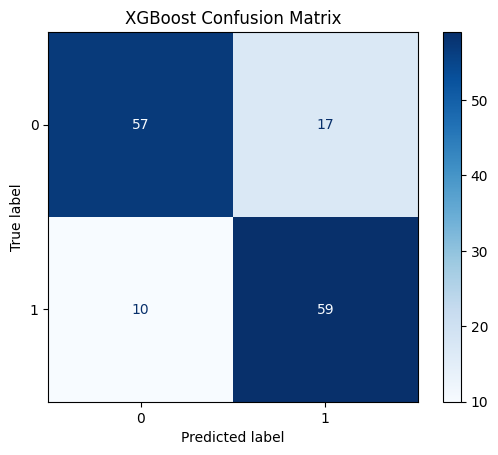

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        74
           1       0.77      0.86      0.81        69

    accuracy                           0.80       143
   macro avg       0.81      0.81      0.80       143
weighted avg       0.81      0.80      0.80       143



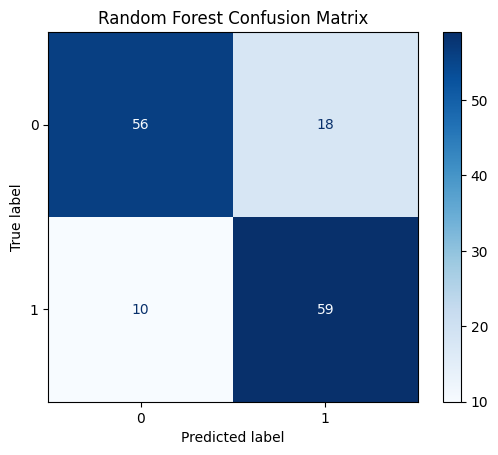

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.61      0.71        74
           1       0.68      0.88      0.77        69

    accuracy                           0.74       143
   macro avg       0.76      0.75      0.74       143
weighted avg       0.77      0.74      0.74       143



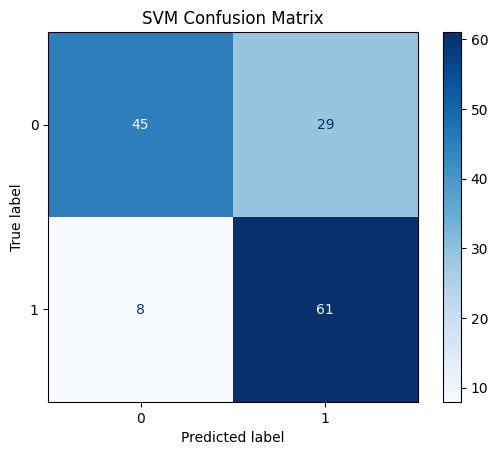

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.64      0.71        74
           1       0.68      0.83      0.75        69

    accuracy                           0.73       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.74      0.73      0.73       143



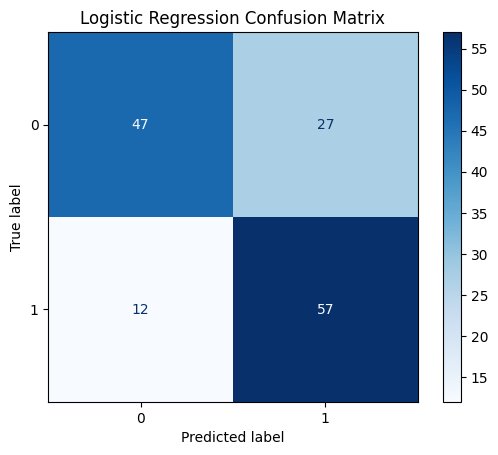

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        74
           1       0.74      0.84      0.79        69

    accuracy                           0.78       143
   macro avg       0.79      0.79      0.78       143
weighted avg       0.79      0.78      0.78       143



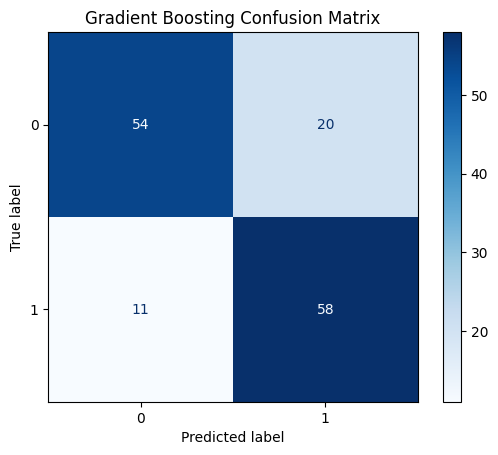

Voting Classifier Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        74
           1       0.74      0.88      0.81        69

    accuracy                           0.80       143
   macro avg       0.81      0.80      0.80       143
weighted avg       0.81      0.80      0.80       143



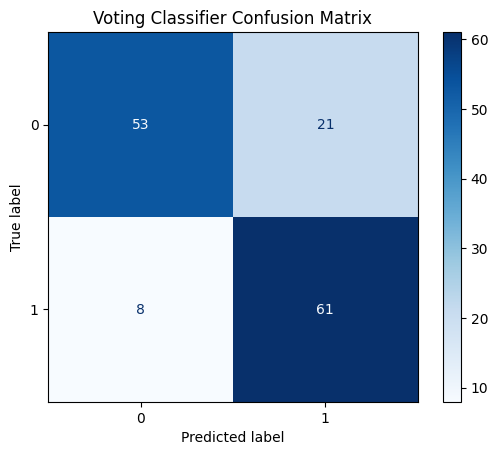

Stacking Classifier Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        74
           1       0.77      0.90      0.83        69

    accuracy                           0.82       143
   macro avg       0.83      0.82      0.82       143
weighted avg       0.83      0.82      0.82       143



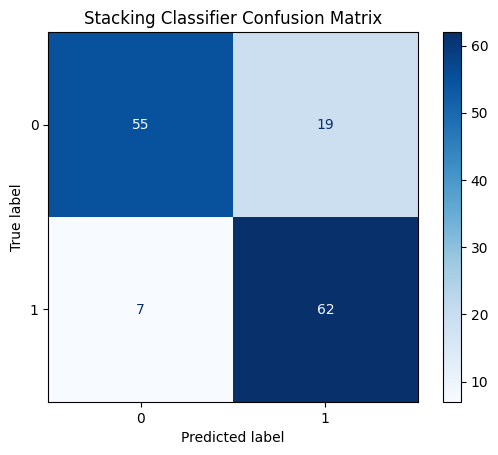

Optimal index exceeds threshold array bounds.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluate individual classifiers
classifiers = {
    'XGBoost': best_xgb,
    'Random Forest': rf,
    'SVM': svm,
    'Logistic Regression': log_reg,
    'Gradient Boosting': gb
}

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Adjust labels as needed
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{clf_name} Confusion Matrix")
    plt.show()

# Ensemble: Voting Classifier
y_pred_voting = voting_clf.predict(X_test)
print("Voting Classifier Report:")
print(classification_report(y_test, y_pred_voting))

# Confusion Matrix for Voting Classifier
cm_voting = confusion_matrix(y_test, y_pred_voting)
disp_voting = ConfusionMatrixDisplay(confusion_matrix=cm_voting, display_labels=[0, 1])  # Adjust labels as needed
disp_voting.plot(cmap=plt.cm.Blues)
plt.title("Voting Classifier Confusion Matrix")
plt.show()

# Ensemble: Stacking Classifier
y_pred_stacking = stack_clf.predict(X_test)
print("Stacking Classifier Report:")
print(classification_report(y_test, y_pred_stacking))

# Confusion Matrix for Stacking Classifier
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
disp_stacking = ConfusionMatrixDisplay(confusion_matrix=cm_stacking, display_labels=[0, 1])  # Adjust labels as needed
disp_stacking.plot(cmap=plt.cm.Blues)
plt.title("Stacking Classifier Confusion Matrix")
plt.show()

# Generate the precision-recall curve for the last model (stack_clf or voting_clf)
y_pred_prob = stack_clf.predict_proba(X_test)[:, 1]  # Or use `voting_clf.predict_proba(X_test)[:, 1]` if you want to use Voting Classifier's probabilities
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Check if thresholds array is not empty
if len(thresholds) > 0:
    # Find the index that maximizes precision - recall
    optimal_idx = np.argmax(precision - recall)

    # Ensure the index is within bounds
    if optimal_idx < len(thresholds):
        optimal_threshold = thresholds[optimal_idx]

        # Adjust predictions based on optimal threshold
        y_pred_adjusted = (y_pred_prob >= optimal_threshold).astype(int)

        print(f"Adjusted Threshold Classification Report (Threshold={optimal_threshold:.2f}):")
        print(classification_report(y_test, y_pred_adjusted))

        # Confusion Matrix for adjusted threshold predictions
        cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
        disp_adjusted = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted, display_labels=[0, 1])
        disp_adjusted.plot(cmap=plt.cm.Blues)
        plt.title("Adjusted Threshold Confusion Matrix")
        plt.show()
    else:
        print("Optimal index exceeds threshold array bounds.")
else:
    print("No valid thresholds found.")
